## Emissions widget:

* dyanamic sentence

* stacked chart of historical LULC and agriculture emissions

We will need to use the Climate Watch API and grab data:

- Total including LUCF (for DS)
- Agriculture
- Land-use change and Forestry

https://www.climatewatchdata.org/countries/BRA?calculation=ABSOLUTE_VALUE&filter=312%2C314&source=25

In [1]:
#Import Global Metadata etc

%run '0.Importable_Globals.ipynb'

In [146]:
# For FAO data, only country (admin0) level data are avaiable

adm0 = 'BRA'  

In [147]:
url = f"https://www.climatewatchdata.org/api/v1/emissions?gas=107&location={adm0}&source=25"

r = requests.get(url)
r.url

'https://www.climatewatchdata.org/api/v1/emissions?gas=107&location=BRA&source=25'

In [148]:
# keys = ['Total including LUCF','Land-Use Change and Forestry','Agriculture']

In [149]:
def extract_emissions(response, key):
    """After a response from the Climate Watch API extract two lists of
        years and values for a specified emission type.
        e.g. ['Total including LUCF','Land-Use Change and Forestry','Agriculture']:
        Returns year, values in absolute emissions, and values relative to total annual emissions
    """
    years = []
    values = []
    total_emissions = []
    for item in r.json():
        if item.get('sector') == 'Total including LUCF':
            for row in (item.get('emissions')):
                total_emissions.append(row.get('value'))
    np.array(total_emissions)
    for k in [key]:
        for item in response.json():
            if item.get('sector') == k:
                for row in (item.get('emissions')):
                    years.append(row.get('year'))
                    values.append(row.get('value'))
                return np.array(years), np.array(values), np.array(total_emissions)

In [150]:
extract_emissions(r, 'Agriculture')

(array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
        2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014]),
 array([ 302.5423328,  312.4326635,  317.8870536,  319.6683297,
         327.0293062,  332.3812289,  318.2947615,  325.6861644,
         335.6865696,  337.4773276,  341.1072286,  353.818294 ,
         374.7432019,  393.2494078,  410.7856584,  416.3333871,
         409.1959109,  417.5313732,  408.9029981,  415.5229984,
         441.2131202,  441.8203379,  444.7040896,  436.7751343,  441.905044 ]),
 array([ 1447.653543,  1465.844663,  1476.230291,  1485.825681,
         1502.235855,  1527.666602,  1534.877666,  1564.6065  ,
         1595.554226,  1601.854106,  1603.082776,  1837.953031,
         1862.769119,  1876.704097,  1915.827171,  1939.65705 ,
         1352.80411 ,  1404.577951,  1394.024448,  1377.597315,
         1483.812483,  1252.95472 ,  1306.773256,  1317.218618,  1357.1811  ]))

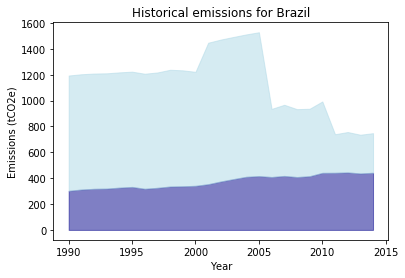

In [151]:
years, agriculture_values, total_emissions = extract_emissions(r, 'Agriculture')
_, lucf_values, _ = extract_emissions(r, 'Land-Use Change and Forestry')

width = 0.35
fig, ax = plt.subplots()
ax.fill_between(years, 0, agriculture_values, color='darkblue', alpha=0.5)
ax.fill_between(years, agriculture_values, agriculture_values + lucf_values, color='lightblue', alpha=0.5)

# add some text for labels, title and axes ticks
ax.set_ylabel(f'Emissions (tCO2e)')
ax.set_xlabel('Year')
ax.set_title(f"Historical emissions for {iso_to_countries[adm0]}")
plt.show()

On hover you can show the absolute and relative emissions. Relative emissions are calculated as a % of the total emissions, e.g:

In [152]:
relative_agriculture_emissions = (agriculture_values / total_emissions) * 100
print(relative_agriculture_emissions)

[ 20.89880789  21.31417274  21.53370348  21.51452447  21.76950478
  21.75744554  20.73746778  20.81585142  21.03886939  21.06791913
  21.27820433  19.25067116  20.11753352  20.95425744  21.44168663
  21.46427829  30.24797958  29.72646501  29.33255573  30.16287807
  29.73509963  35.26227491  34.03070024  33.15889468  32.56050677]


In [182]:
emission_fraction = ((sum(agriculture_values) + sum(lucf_values))/sum(total_emissions)) * 100

(
    f"In {iso_to_countries[adm0]}, "
    f"land-use change and forestry combined with agriculture "
    f"contributed {lucf_values.sum() + agriculture_values.sum():3,.0f} tCO₂e of emissions "
    f"emissions from {years.min()}–{years.max()}, "
    f"{emission_fraction:2.0f}% of {iso_to_countries[adm0]}'s "
    f"total over this period."
)


"In Brazil, land-use change and forestry combined with agriculture contributed 28,580 tCO₂e of emissions emissions from 1990–2014, 74% of Brazil's total over this period."